# Lab 1 Norbert Sak (group 1a)

## Excersise 1

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data1.csv", index_col=0)

df.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


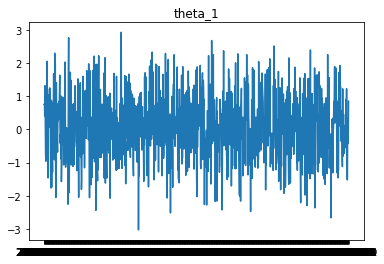

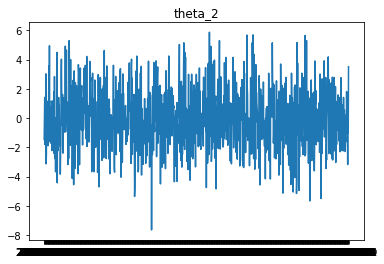

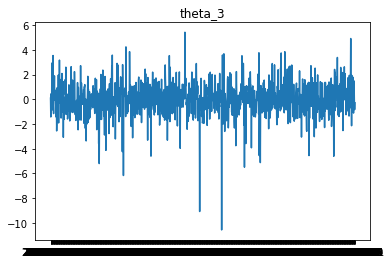

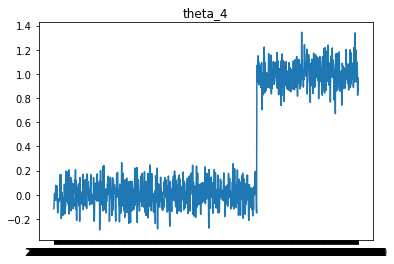

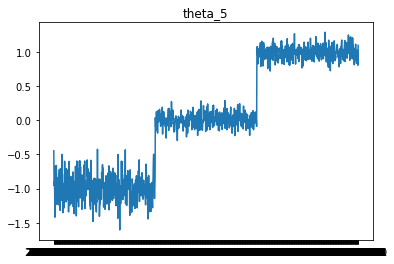

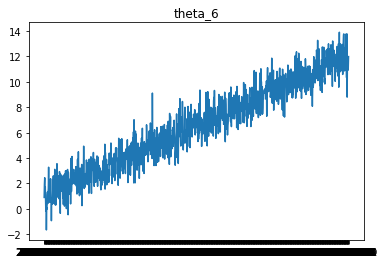

In [2]:
for i in df.columns:
    plt.plot(df.index, df[i])
    plt.title(i)
    plt.show()


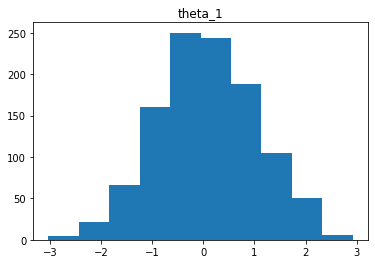

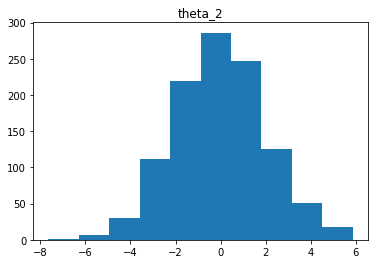

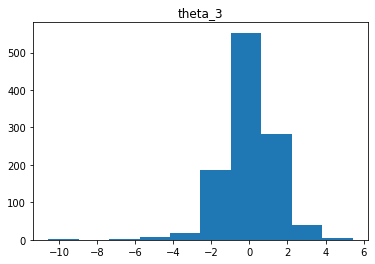

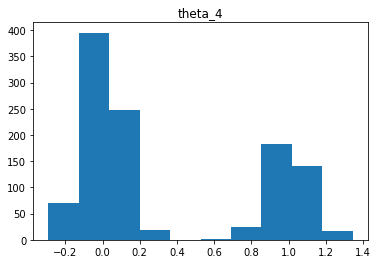

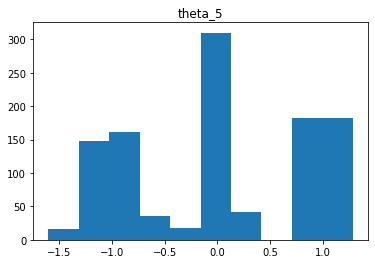

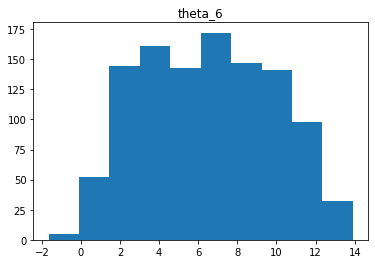

In [27]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()


C:\Users\norbe\AppData\Local\Temp\ipykernel_12604\111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


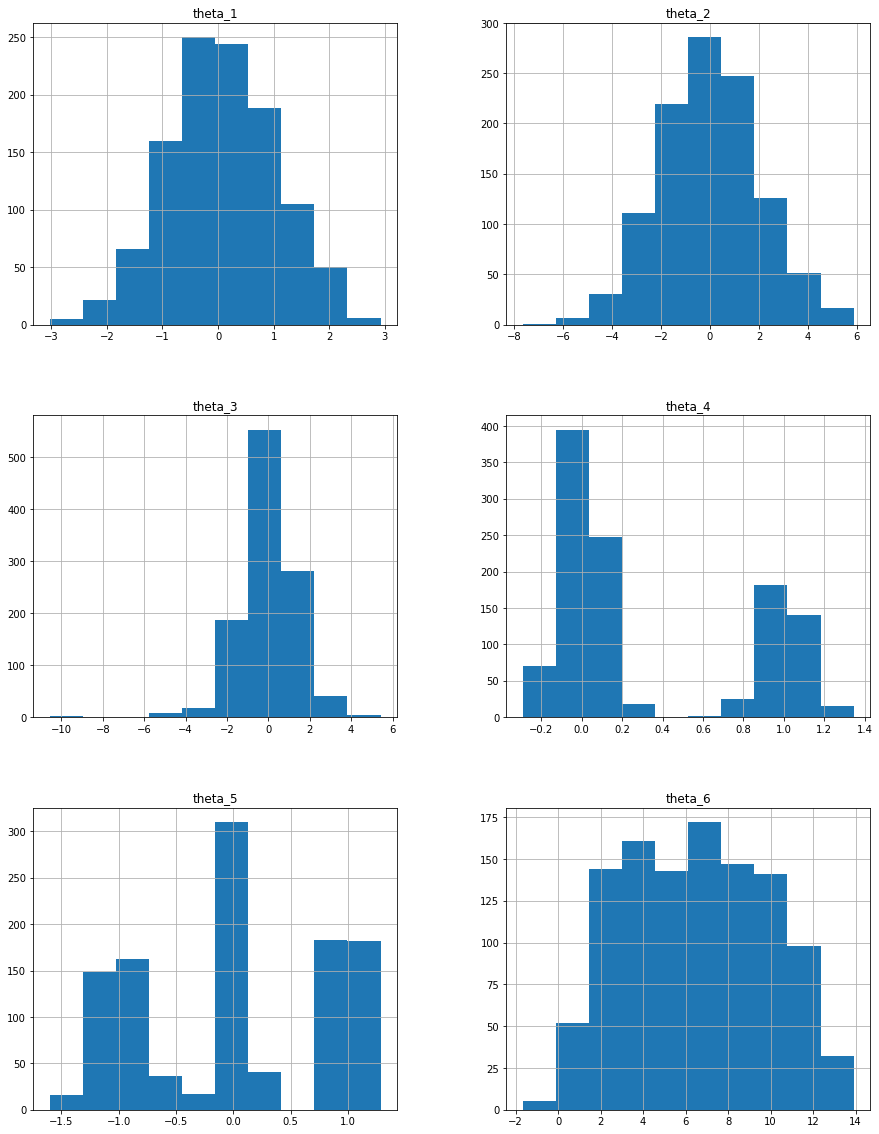

In [32]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

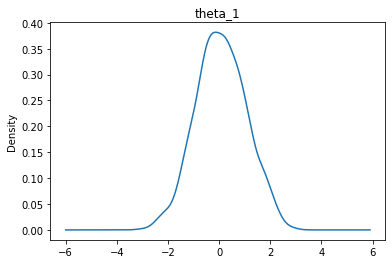

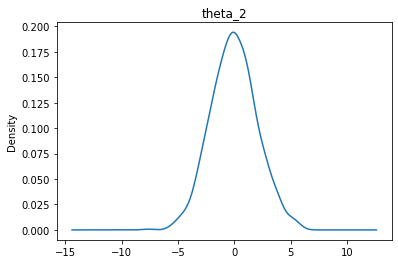

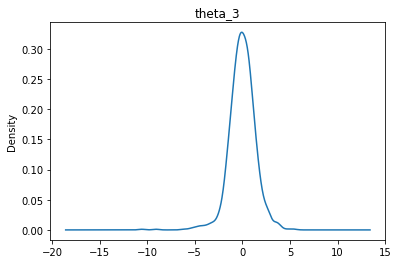

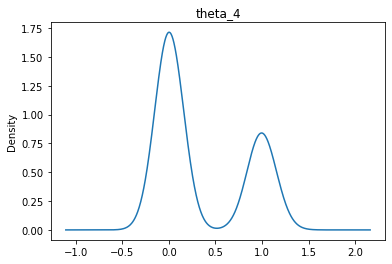

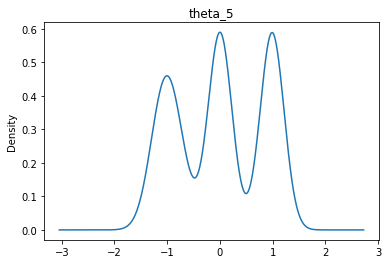

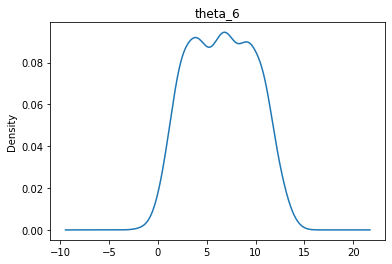

In [26]:
for i in df.columns:
    ax = df[i].plot.kde()
    plt.title(i)
    plt.show()

In [34]:
df_2018 = df.loc['2018-01-01':'2018-12-31'][["theta_1", "theta_2", "theta_3", "theta_4"]]
df_2018.head()

,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025


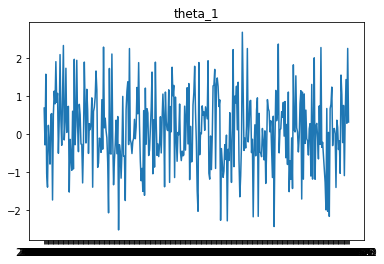

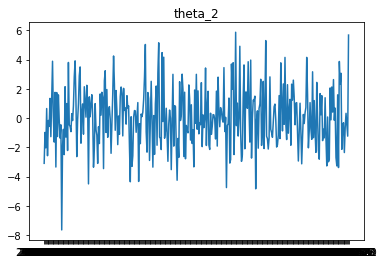

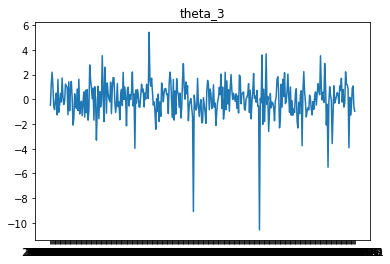

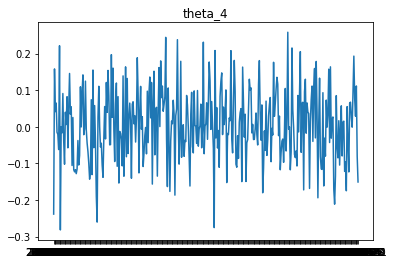

In [35]:
for i in df_2018.columns:
    plt.plot(df_2018.index, df_2018[i])
    plt.title(i)
    plt.show()

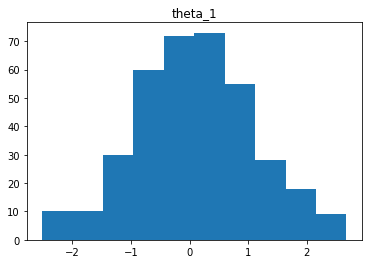

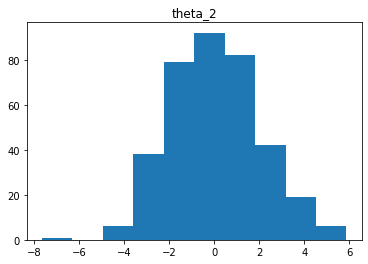

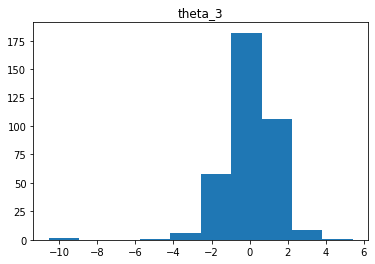

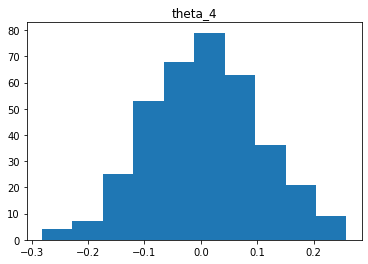

In [36]:
for i in df_2018.columns:
    plt.hist(df_2018[i])
    plt.title(i)
    plt.show()

C:\Users\norbe\AppData\Local\Temp\ipykernel_12604\712917149.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_2018.hist(ax = ax)


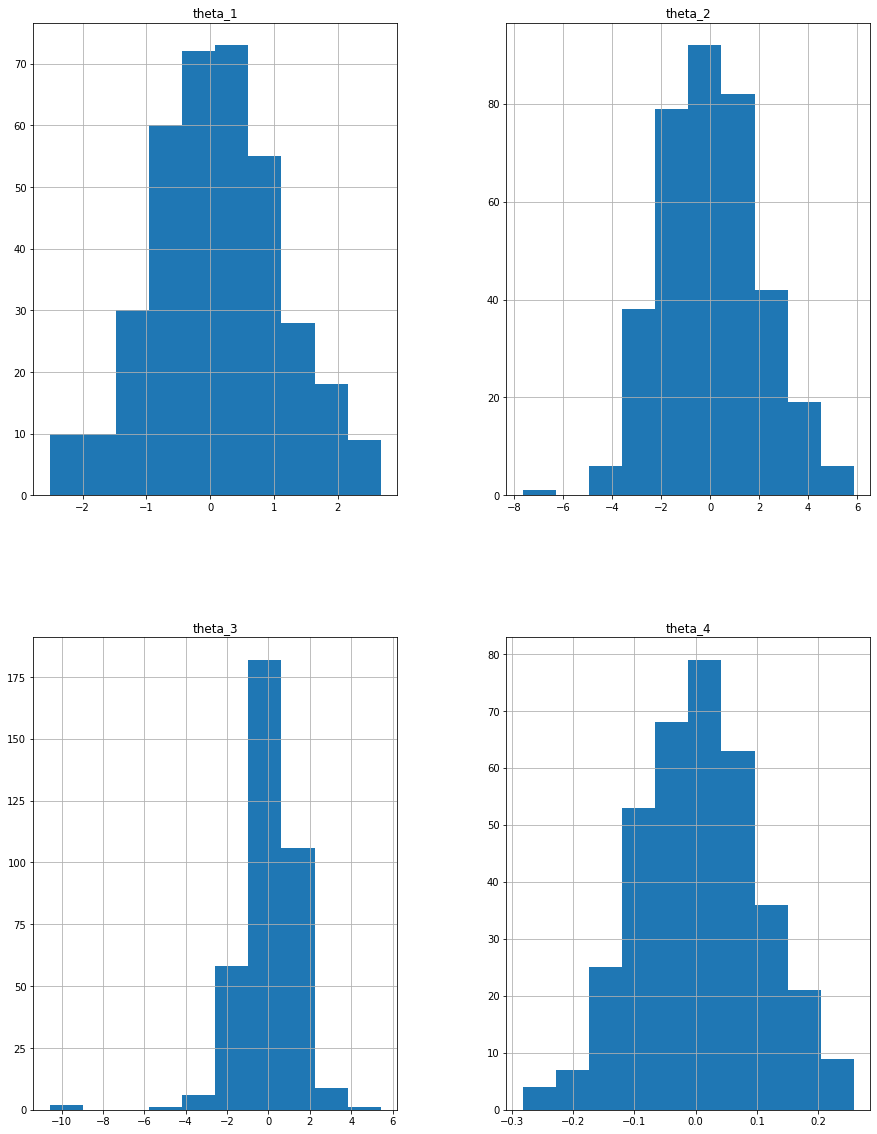

In [37]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_2018.hist(ax = ax)
plt.show()

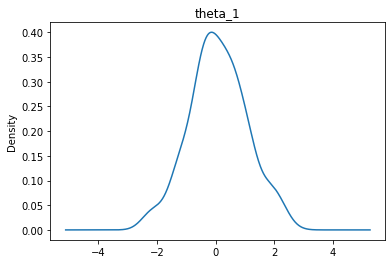

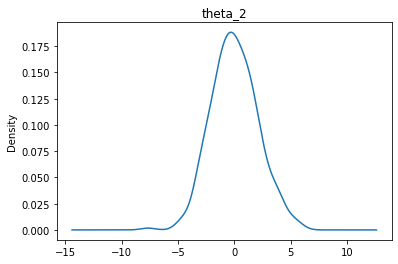

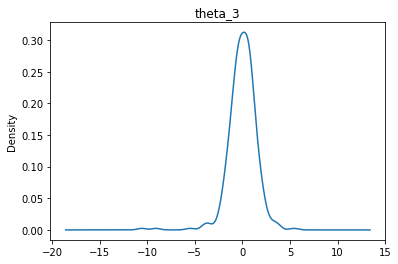

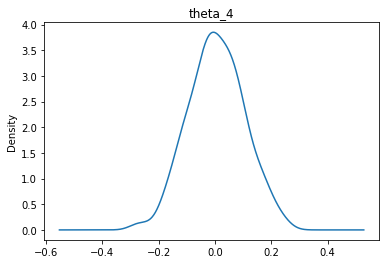

In [38]:
for i in df_2018.columns:
    ax = df_2018[i].plot.kde()
    plt.title(i)
    plt.show()

## Excersise 2

In [1]:
from cmdstanpy import CmdStanModel

In [17]:
# F=7 L=3

data = {"N": 10, "y": [0, 1, 0, 0, 1, 1, 0, 0, 0, 0]}

model = CmdStanModel(stan_file="bern_1.stan")

INFO:cmdstanpy:found newer exe file, not recompiling


In [18]:
fit = model.sample(data=data, output_dir='out')
theta = fit.stan_variable("theta")

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [19]:
df = fit.summary()

df

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-8.20,0.0200,0.72,-9.60,-7.90,-7.60,1300.0,6300.0,1.0
theta,0.33,0.0033,0.13,0.14,0.32,0.57,1600.0,8100.0,1.0


In [20]:
df_theta = df.loc['theta']

mean = theta.mean()
median = df_theta["50%"]
q5 = df_theta["5%"]
q95 = df_theta["95%"]

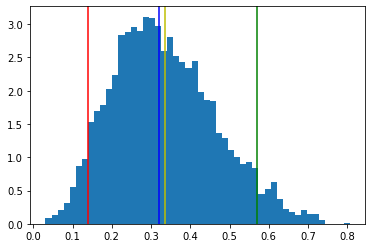

In [26]:
plt.hist(theta, bins=50, density=True)
plt.axvline(mean, color='y')
plt.axvline(median, color='b')
plt.axvline(q5, color='r')
plt.axvline(q95, color='g')
plt.show()